# Average patterns 
With this notebook we want to see the average pattern over different timescales

In [7]:
# Load variables from load_original_data
import data_loader
dmas_h_cons, raw_weather, calendar, dmas_characteristics = data_loader.load_original_data()

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Daily patterns 

### Scaled average daily patterns 
A single plot with the scaled average daily pattern for each DMA and for the network.

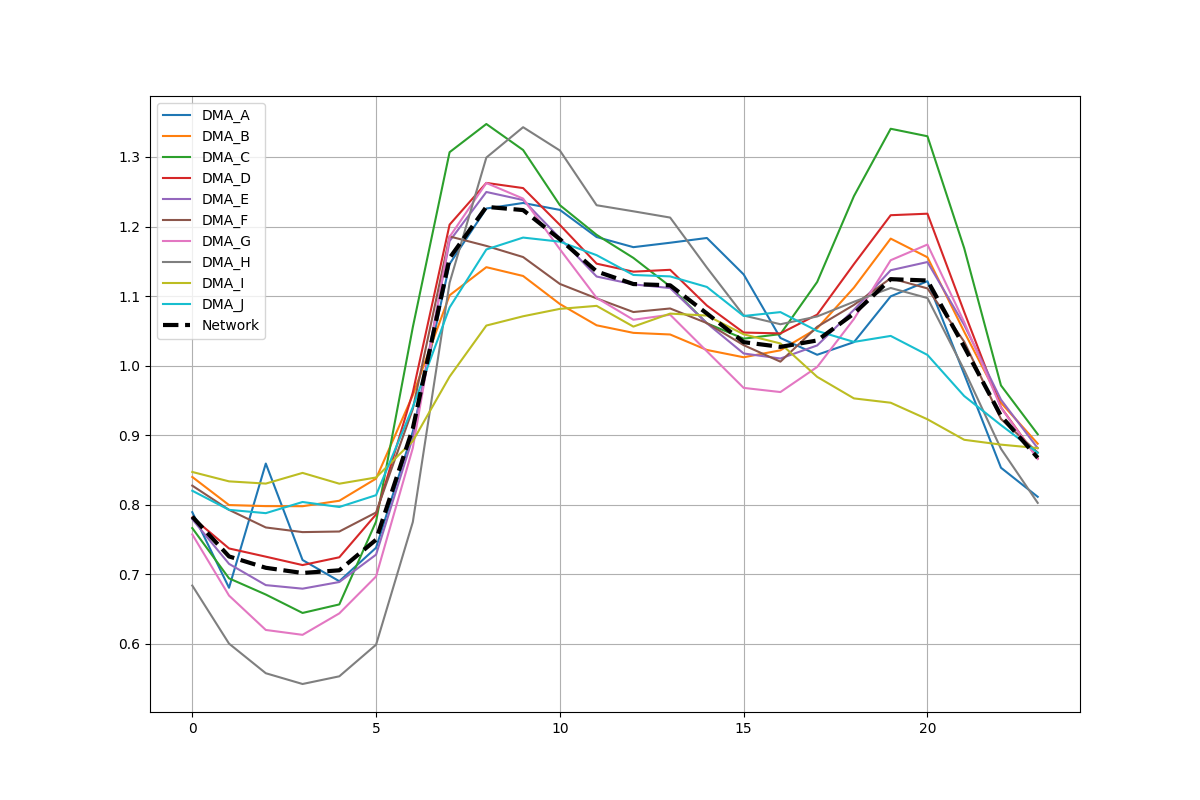

In [9]:
net_h_cons = dmas_h_cons.sum(axis=1, skipna=False)

dmas_h_cons__byhour = dmas_h_cons.groupby(dmas_h_cons.index.hour)
net_h_cons__byhour = net_h_cons.groupby(net_h_cons.index.hour)

plt.figure(figsize=(12, 8))
for dma in dmas_characteristics.index:
    plt.plot(dmas_h_cons__byhour[dma].mean()/dmas_characteristics.loc[dma,'h_mean'], label=dma)

plt.plot(net_h_cons__byhour.mean()/dmas_characteristics.loc[:,'h_mean'].sum(), label='Network', linewidth=3, linestyle='--', color='black')
plt.legend()
plt.grid(True)

### Network scaled daily pattern 
The first plot represent the total consumption of the network with the variance for each hour. The second onestandard deviation of each hour.

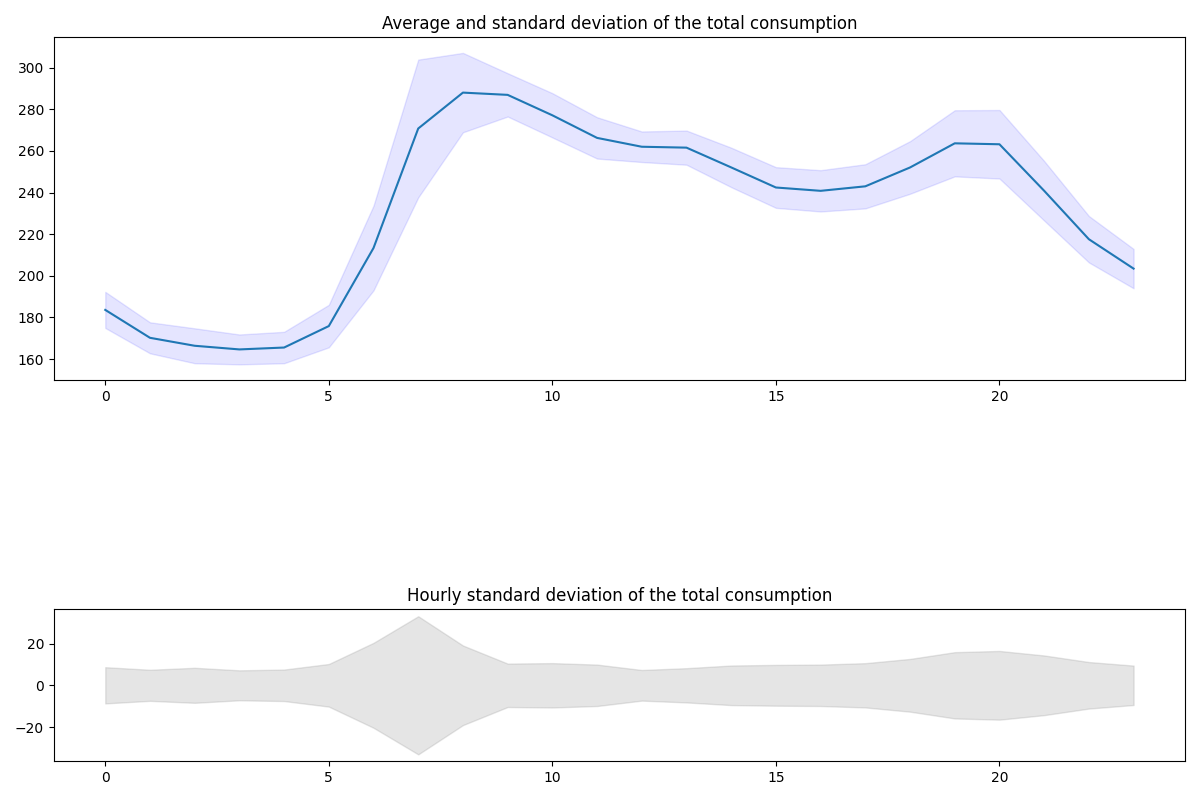

In [10]:
plt.figure(figsize=(12, 8))
gspec = plt.GridSpec(4, 1)

# Plot the average and one standard deviation of the inflow for the total consumption
plt.subplot(gspec[0:2, 0])
plt.title('Average and standard deviation of the total consumption')
plt.plot(net_h_cons__byhour.mean(), label='Line')
plt.fill_between(net_h_cons__byhour.mean().index, net_h_cons__byhour.mean()+net_h_cons__byhour.std(), net_h_cons__byhour.mean()-net_h_cons__byhour.std(), color='b', alpha=.1)

# Plot the normal distribution for the total consumption
plt.subplot(gspec[3, 0])
plt.title('Hourly standard deviation of the total consumption')
plt.fill_between(net_h_cons__byhour.mean().index, net_h_cons__byhour.std(), -net_h_cons__byhour.std(), color='gray', alpha=.2)

plt.tight_layout()


### Scaled daily pattern by DMA
A plot for each DMA, with average value and standard deviation at the hourly level.


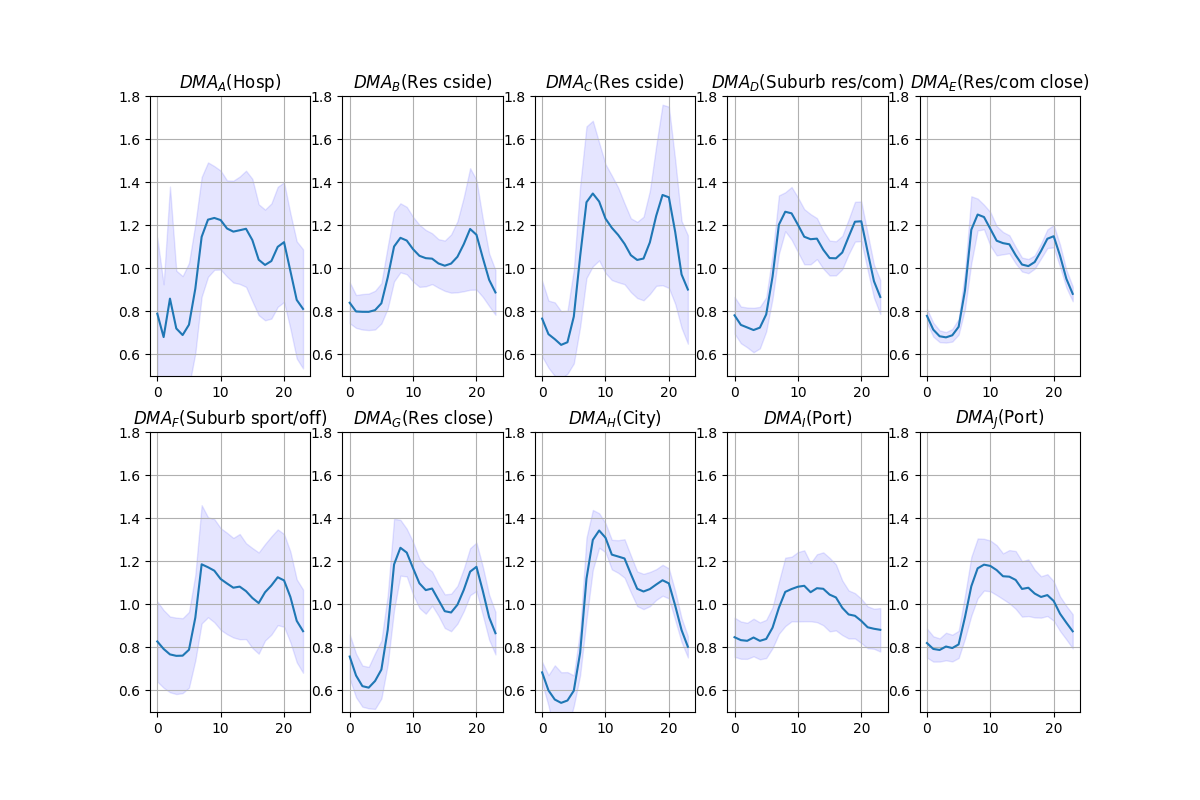

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(12, 8))

for ax, dma in zip(axs.flatten(), dmas_characteristics.index):
    dma_ave = dmas_characteristics.loc[dma,'h_mean']
    ax.plot(dmas_h_cons__byhour[dma].mean()/dma_ave, label=dma)
    ax.fill_between(dmas_h_cons__byhour[dma].mean().index, 
                    (dmas_h_cons__byhour[dma].mean()+dmas_h_cons__byhour[dma].std())/dma_ave, 
                    (dmas_h_cons__byhour[dma].mean()-dmas_h_cons__byhour[dma].std())/dma_ave, 
                    color='b', alpha=.1)
    ax.set_title(f"${dma} (${dmas_characteristics.loc[dma, 'desc_short']})")
    ax.grid(True)
    ax.set_ylim([0.5, 1.8])


## Weekly patterns

### Scaled average weekly patterns 
A single plot with the scaled average weekly pattern for each DMA and for the network.

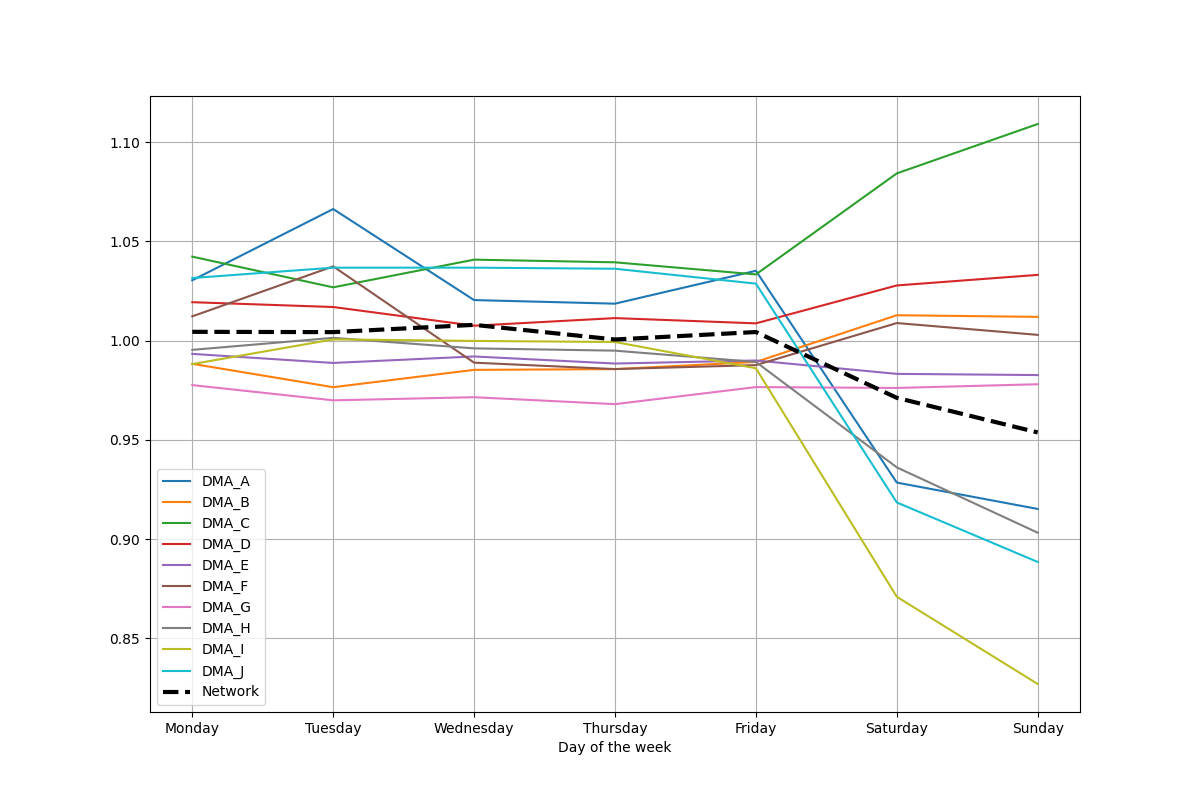

In [13]:
dmas_d_cons = dmas_h_cons.resample('D').sum(min_count=24)
net_d_cons = net_h_cons.resample('D').sum(min_count=24)

dma_d_cons__byday = dmas_d_cons.groupby(dmas_d_cons.index.dayofweek)
net_d_cons__byday = net_d_cons.groupby(net_d_cons.index.dayofweek)

plt.figure(figsize=(12, 8))
for dma in dmas_characteristics.index:
    plt.plot(dma_d_cons__byday[dma].mean()/dmas_characteristics.loc[dma,'d_mean'], label=dma)

plt.plot(net_d_cons__byday.mean()/dmas_characteristics.loc[:,'d_mean'].sum(), label='Network', linewidth=3, linestyle='--', color='black')
plt.legend()
plt.grid(True)
plt.xlabel('Day of the week')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


### Scaled daily pattern total consumption
A plot for the toal consumption with confidence plot


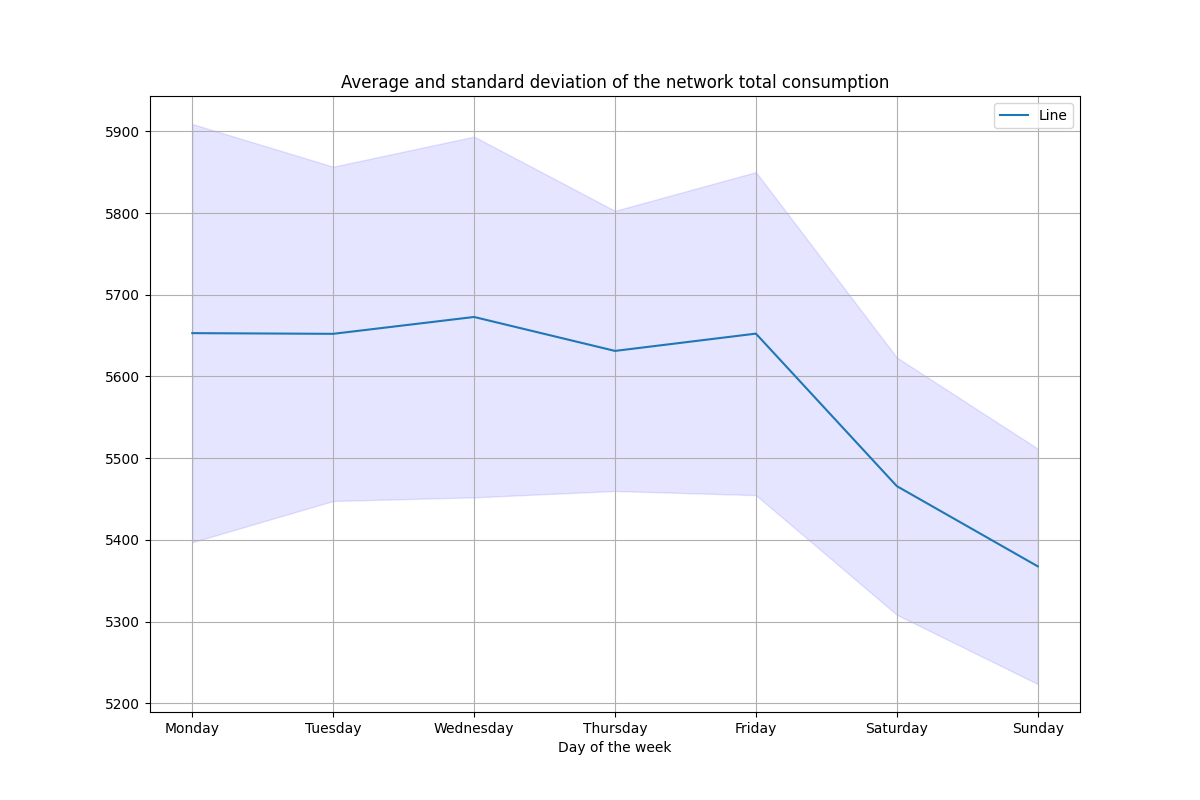

In [14]:
plt.figure(figsize=(12, 8))
plt.title('Average and standard deviation of the network total consumption')
plt.plot(net_d_cons__byday.mean(), label='Line')
plt.fill_between(net_d_cons__byday.mean().index, net_d_cons__byday.mean()+net_d_cons__byday.std(), net_d_cons__byday.mean()-net_d_cons__byday.std(), color='b', alpha=.1)
plt.legend()
plt.grid(True)
plt.xlabel('Day of the week')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


### Scaled daily pattern DMA
A plot for each DMA, with average value and confidence plot

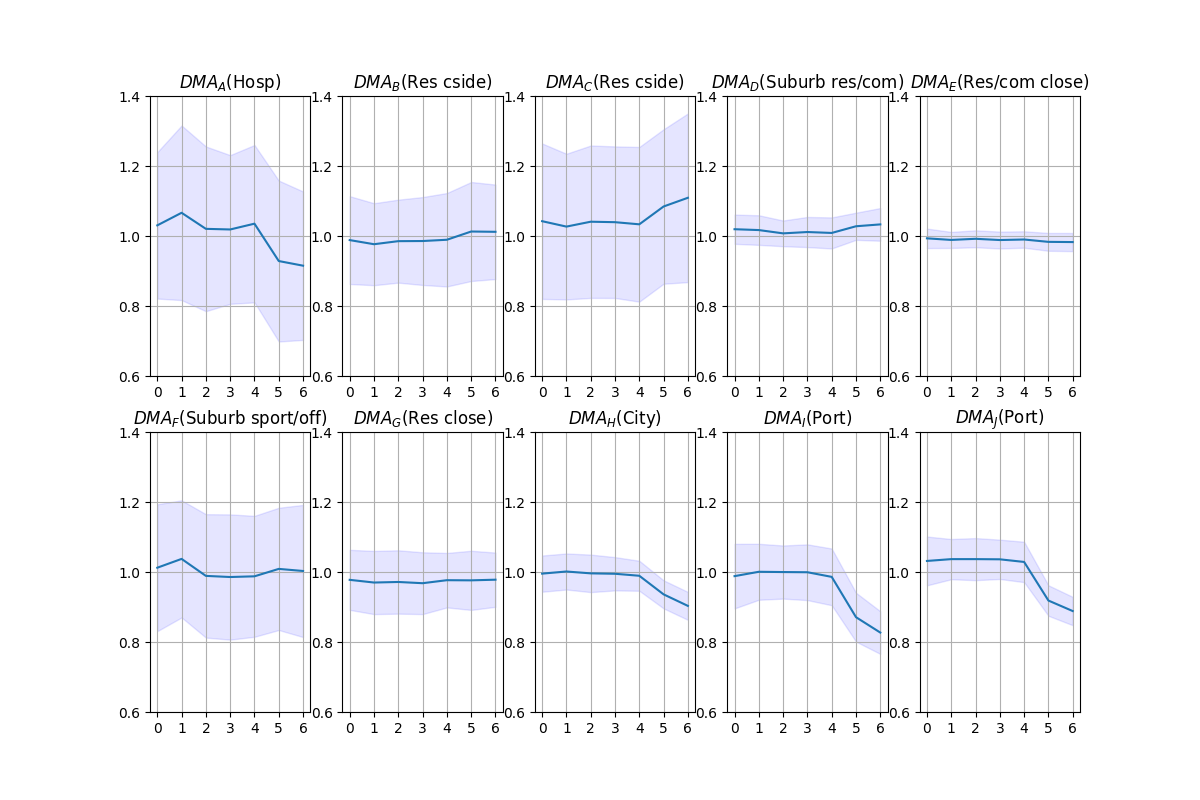

In [21]:
fig, axs = plt.subplots(2, 5, figsize=(12, 8))

for ax, dma in zip(axs.flatten(), dmas_characteristics.index):
    ax.plot(dma_d_cons__byday[dma].mean()/dmas_characteristics.loc[dma,'d_mean'], label=dma)
    ax.fill_between(dma_d_cons__byday[dma].mean().index, 
                    (dma_d_cons__byday[dma].mean()+dma_d_cons__byday[dma].std())/dmas_characteristics.loc[dma,'d_mean'], 
                    (dma_d_cons__byday[dma].mean()-dma_d_cons__byday[dma].std())/dmas_characteristics.loc[dma,'d_mean'], 
                    color='b', alpha=.1)
    ax.set_title(f"${dma} (${dmas_characteristics.loc[dma, 'desc_short']})")
    ax.grid(True)
    ax.set_ylim([0.6, 1.4])
    ax.xaxis.set_ticks(np.arange(7))
    ax.yaxis.set_ticks(np.arange(0.6, 1.401, 0.2))